## **Parte 1**: Entrenamiento Incremental

Comprender los Datos: Antes de entrenar cualquier modelo, es esencial realizar un análisis exploratorio de los datos (EDA) para familiarizarse con las características del conjunto de datos. Esto implica examinar visualizaciones, identificar correlaciones entre variables y comprender la distribución de las clases de transacciones (normales y fraudulentas).

Mejora de Características: El proceso de mejora de características, conocido como feature engineering, desempeña un papel crucial en la construcción de modelos efectivos. Esto implica la exploración y creación de nuevas características a partir de las existentes, como variables temporales (por ejemplo, hora del día, día de la semana), estadísticas agregadas (como la frecuencia de transacciones por cliente) y otras características relevantes. Además, la normalización o estandarización de las características puede ser necesaria según el algoritmo de aprendizaje utilizado.

Abordar el Desequilibrio de Datos: Dado que los conjuntos de datos de transacciones financieras suelen estar desequilibrados, es importante aplicar técnicas para manejar este desequilibrio. Esto puede incluir el uso de técnicas de muestreo, como oversampling o undersampling, así como la generación de datos sintéticos mediante métodos como SMOTE (Synthetic Minority Over-sampling Technique).

Optimización de Hiperparámetros: Experimentar con la optimización de hiperparámetros es fundamental para mejorar el rendimiento de los modelos. Esto implica ajustar los parámetros del modelo para maximizar su rendimiento predictivo.

Implementar Early Stopping: La implementación de early stopping en modelos de aprendizaje profundo es una estrategia importante para prevenir el sobreajuste y reducir el tiempo de entrenamiento. Esta técnica ayuda a detener el proceso de entrenamiento cuando el rendimiento del modelo deja de mejorar en un conjunto de datos de validación separado.

Evaluación de Métricas Adecuadas: Para evaluar el rendimiento del modelo en el contexto de datos desequilibrados, es importante utilizar métricas específicas que tengan en cuenta la naturaleza de los datos. Métricas como el área bajo la curva ROC (ROC-AUC) o la curva precisión-recall son más adecuadas para evaluar modelos en presencia de desequilibrio de clases, ya que proporcionan una imagen más completa del rendimiento del modelo.

**Análisis exploratorio**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('fraud_feature_engineering_example.csv')

Encabezados del dataset

In [21]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,4.97,4.97,0.0,0.0,True
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,107.23,107.23,0.0,0.0,True
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,220.11,220.11,0.0,0.0,True
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,45.00,45.00,0.0,0.0,True
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,41.96,41.96,0.0,0.0,True


Descripción estadística del dataset

In [22]:
print(df.describe())

             cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.014876e+05  1.819508e+07  5.105604e+00  1.

Histograma de la variable "amt"

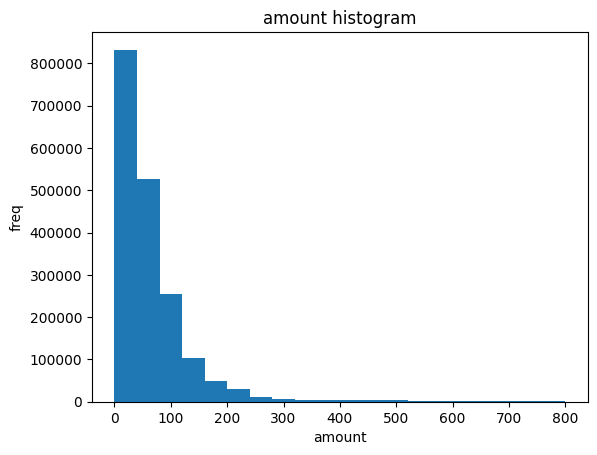

In [23]:
bin_range = (0, 800)

plt.hist(df['amt'], bins=20, range=bin_range)
plt.xlabel('amount')
plt.ylabel('freq')
plt.title('amount histogram')
plt.show()

Gráfico de barras para la variable category

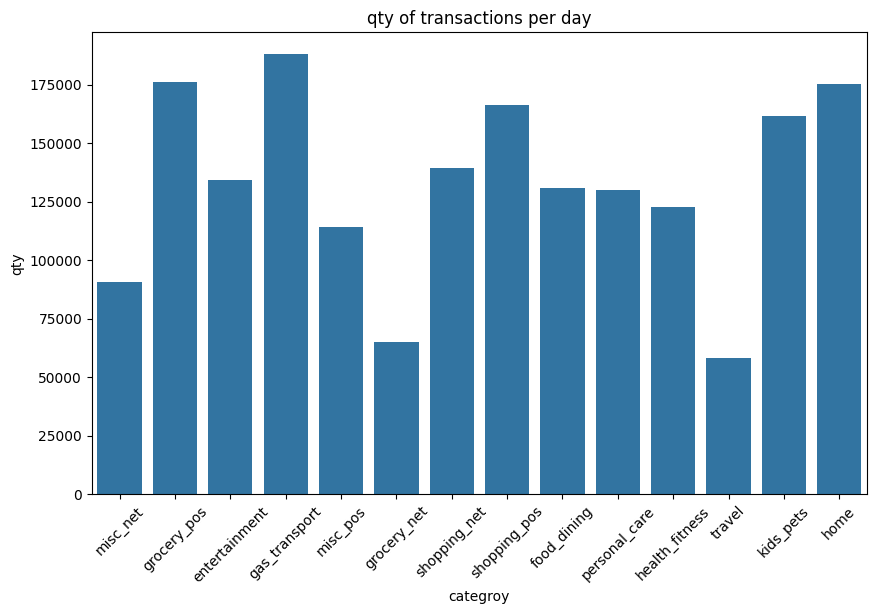

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.xticks(rotation=45)
plt.xlabel('categroy')
plt.ylabel('qty')
plt.title('qty of transactions per day')
plt.show()

Gráfico de dispersión de 'amt' vs 'amt_year' con colores según 'is_fraud'

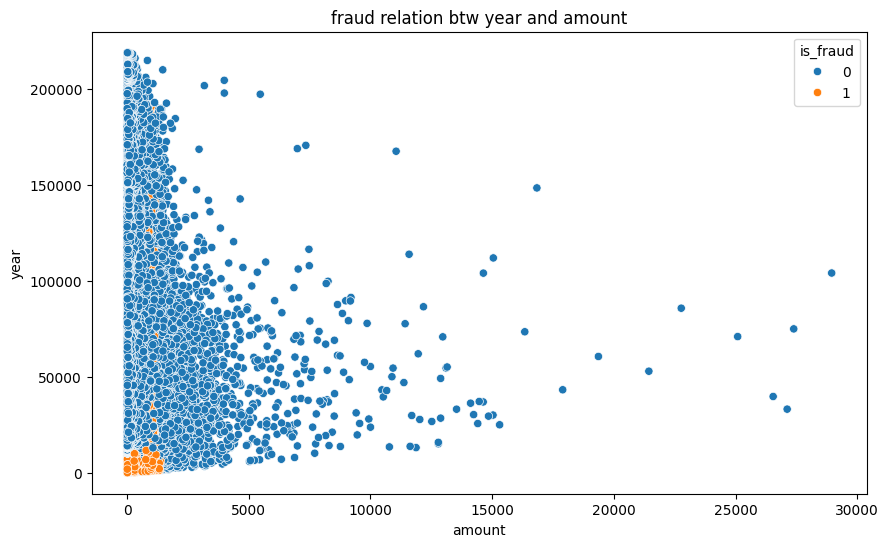

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amt', y='amt_year', hue='is_fraud', data=df)
plt.xlabel('amount')
plt.ylabel('year')
plt.title('fraud relation btw year and amount')
plt.show()

Visualizando las correlaciones del dataset

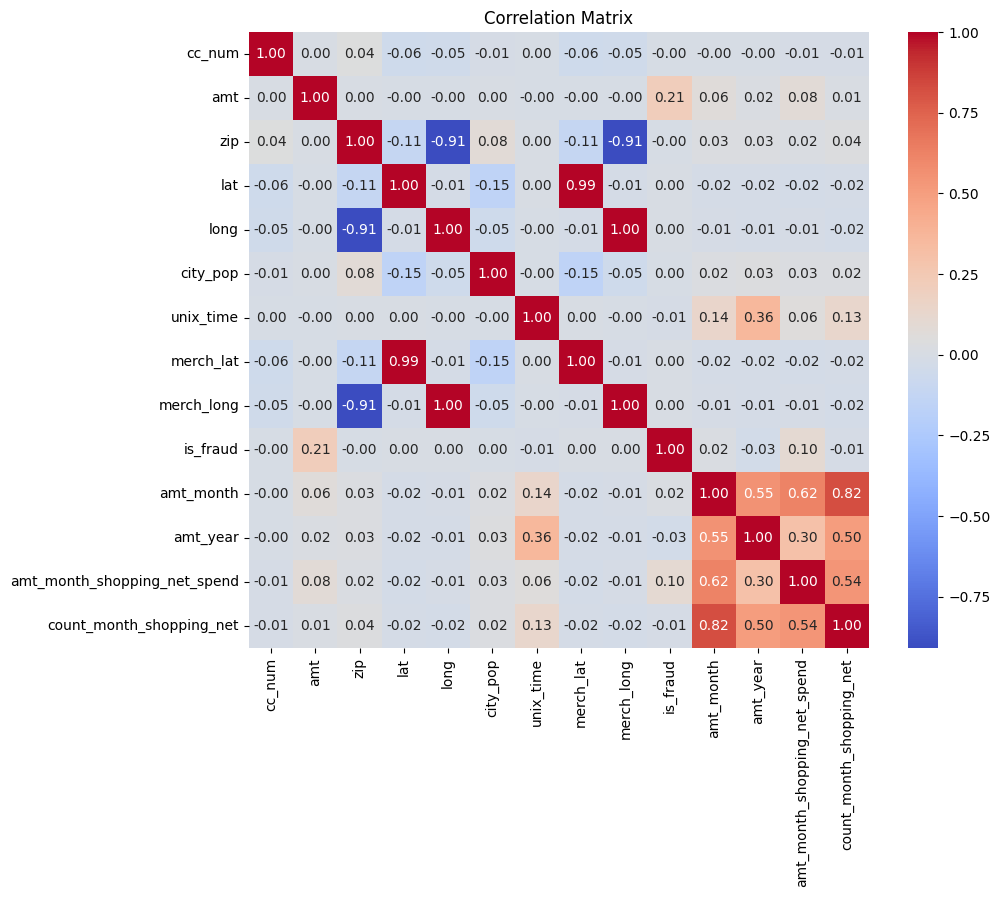

In [26]:

numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Visualización de la distribución de las clases para verificar si hay desbalances en el dataset.

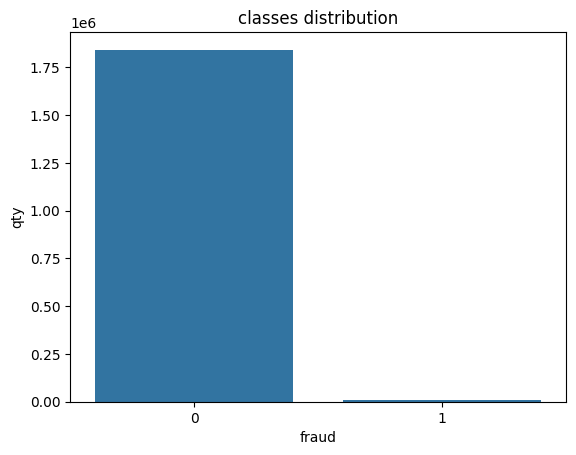

In [27]:
sns.countplot(x='is_fraud', data=df)
plt.xlabel('fraud')
plt.ylabel('qty')
plt.title('classes distribution')
plt.show()

Exploración de variables categóricas

'category' vs 'is_fraud':
is_fraud             0     1
category                    
entertainment   133826   292
food_dining     130524   205
gas_transport   187257   772
grocery_net      64703   175
grocery_pos     173963  2228
health_fitness  122368   185
home            175195   265
kids_pets       161423   304
misc_net         89472  1182
misc_pos        113907   322
personal_care   129795   290
shopping_net    137103  2219
shopping_pos    165407  1056
travel           57800   156


<Figure size 1000x600 with 0 Axes>

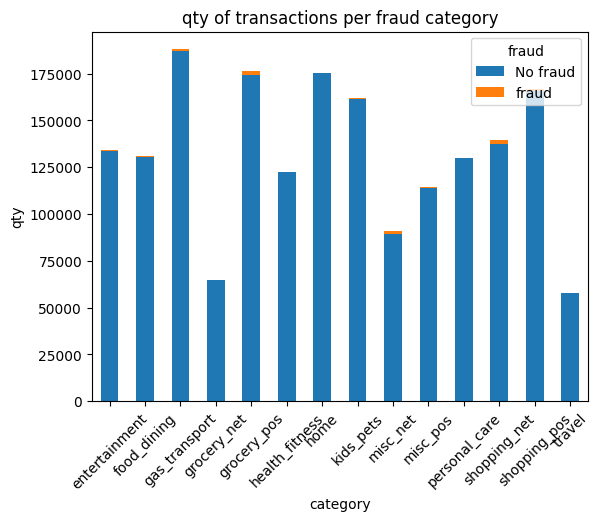

Tabla de frecuencia de la variable 'merchant':
                                  Merchant  Frequency
0                        fraud_Kilback LLC       6262
1                        fraud_Cormier LLC       5246
2                         fraud_Schumm PLC       5195
3                           fraud_Kuhn LLC       5031
4                          fraud_Boyer PLC       4999
..                                     ...        ...
688    fraud_Douglas, DuBuque and McKenzie       1101
689                     fraud_Treutel-King       1098
690                 fraud_Satterfield-Lowe       1095
691     fraud_Hahn, Douglas and Schowalter       1091
692  fraud_Ritchie, Bradtke and Stiedemann       1090

[693 rows x 2 columns]


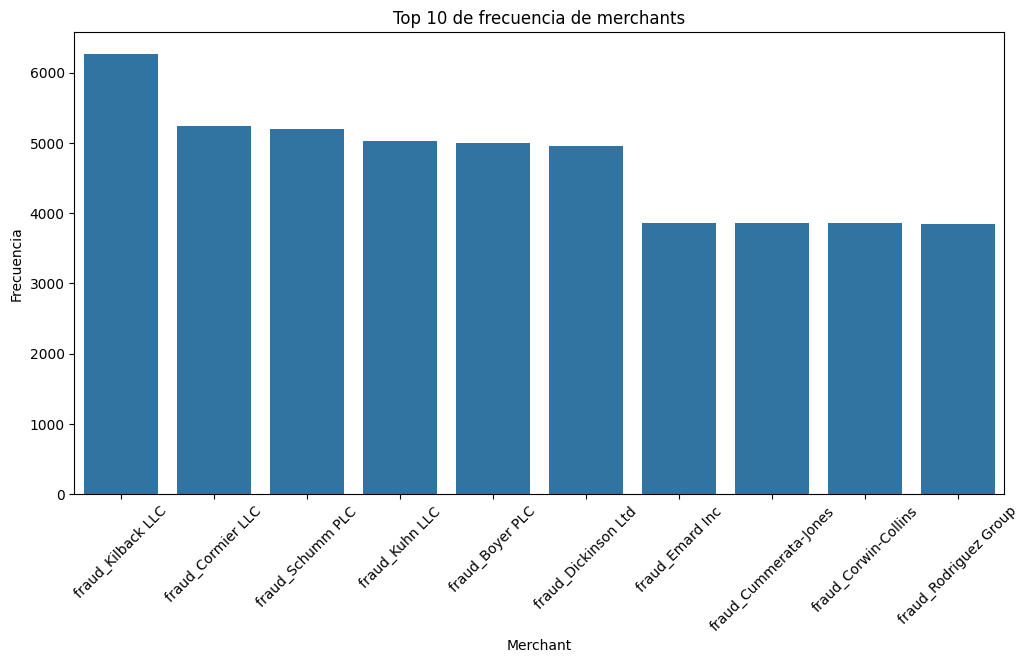

In [28]:

contingency_table = pd.crosstab(df['category'], df['is_fraud'])
print("'category' vs 'is_fraud':")
print(contingency_table)
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('category')
plt.ylabel('qty')
plt.title('qty of transactions per fraud category')
plt.xticks(rotation=45)
plt.legend(title='fraud', labels=['No fraud', 'fraud'])
plt.show()

merchant_freq = df['merchant'].value_counts().reset_index()
merchant_freq.columns = ['Merchant', 'Frequency']
print("Tabla de frecuencia de la variable 'merchant':")
print(merchant_freq)

top_merchants = merchant_freq.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Merchant', y='Frequency', data=top_merchants)
plt.xlabel('Merchant')
plt.ylabel('Frecuencia')
plt.title('Top 10 de frecuencia de merchants')
plt.xticks(rotation=45)
plt.show()

Análisis temporal

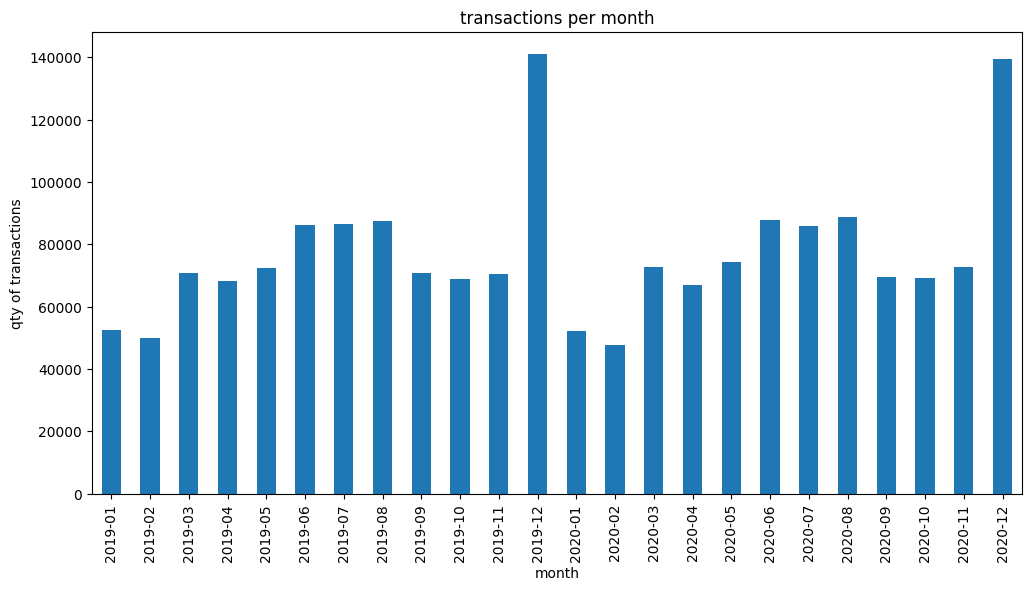

In [29]:

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
transactions_by_month = df.groupby(df['trans_date_trans_time'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
transactions_by_month.plot(kind='bar')
plt.xlabel('month')
plt.ylabel('qty of transactions')
plt.title('transactions per month')
plt.show()

Analisis de variables relacionadas geograficamente

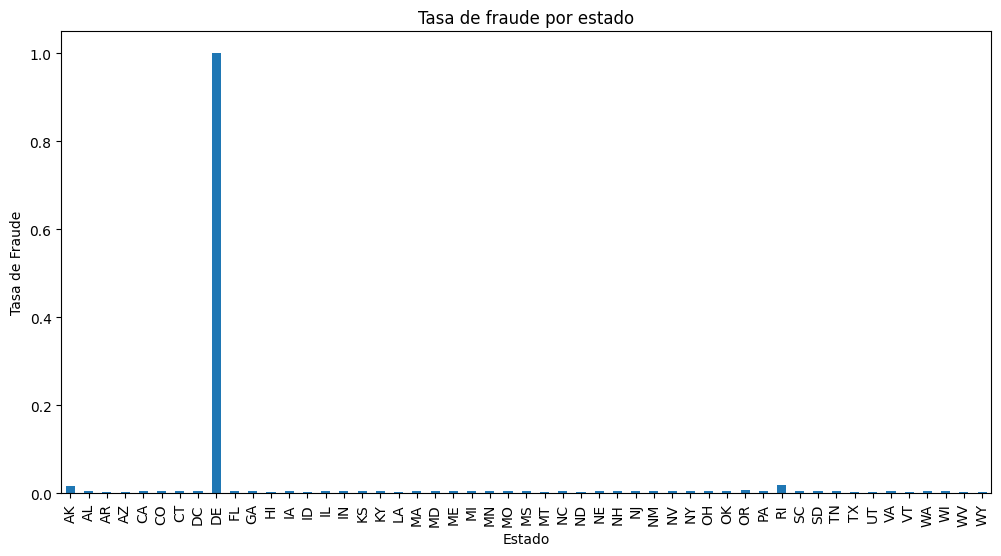

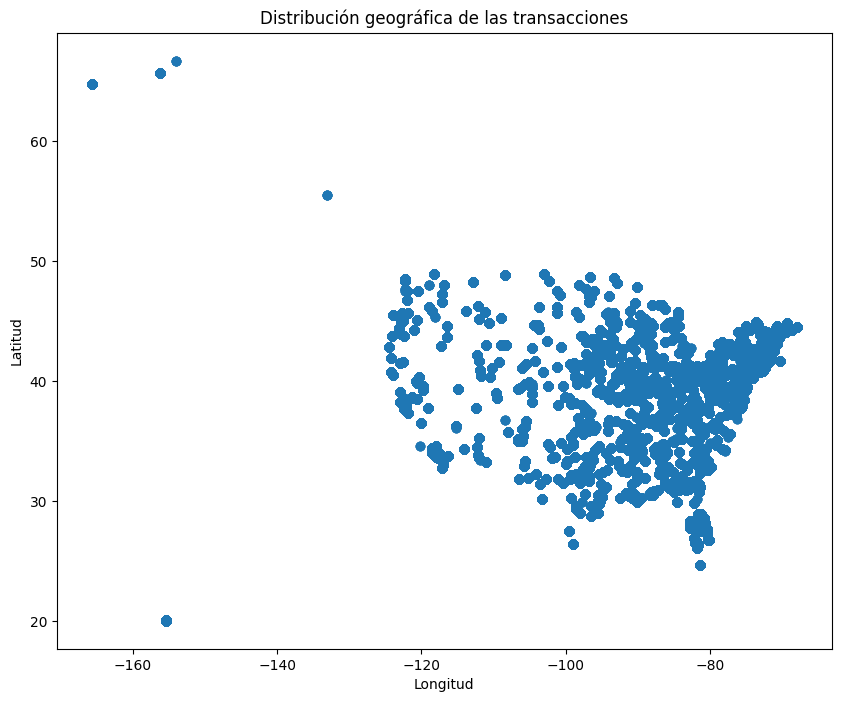

In [30]:
import matplotlib.pyplot as plt

fraud_by_state = df.groupby('state')['is_fraud'].mean()
fig, ax2 = plt.subplots(figsize=(12, 6))
fraud_by_state.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Estado')
ax2.set_ylabel('Tasa de Fraude')
ax2.set_title('Tasa de fraude por estado')

fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(df['long'], df['lat'], alpha=0.5)
ax1.set_xlabel('Longitud')
ax1.set_ylabel('Latitud')
ax1.set_title('Distribución geográfica de las transacciones')


plt.show()

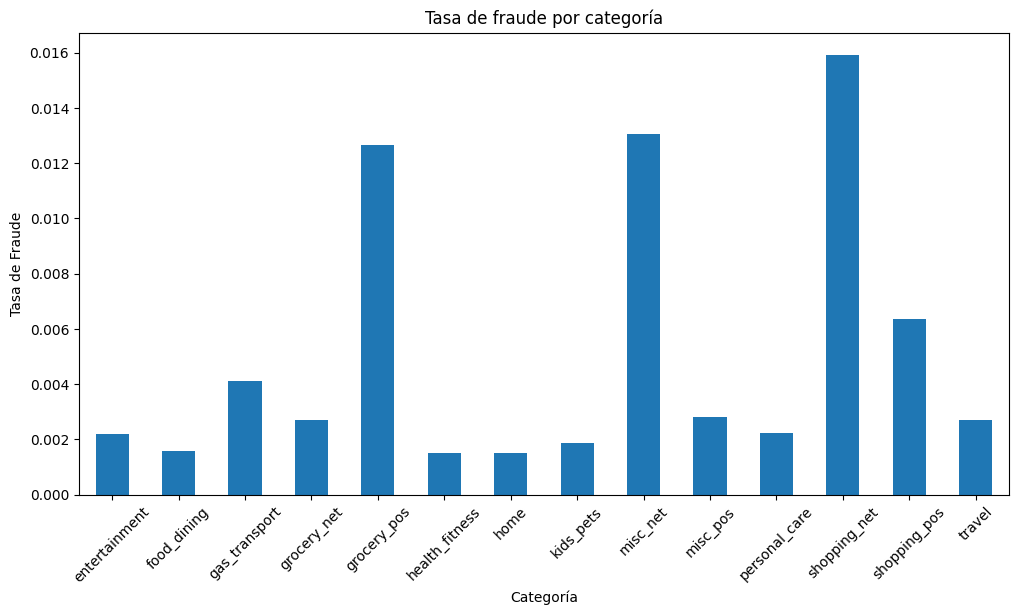

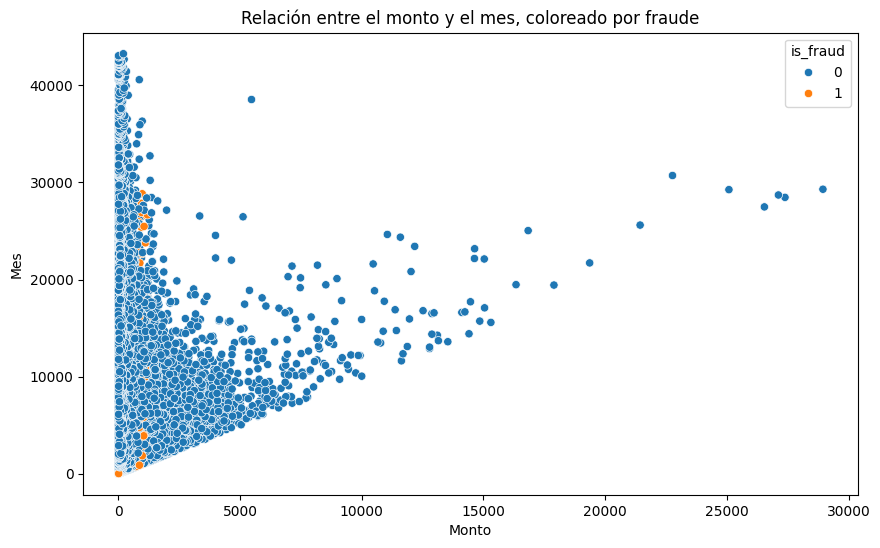

In [31]:
fraud_by_category = df.groupby('category')['is_fraud'].mean()
plt.figure(figsize=(12, 6))
fraud_by_category.plot(kind='bar')
plt.xlabel('Categoría')
plt.ylabel('Tasa de Fraude')
plt.title('Tasa de fraude por categoría')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='amt', y='amt_month', hue='is_fraud', data=df)
plt.xlabel('Monto')
plt.ylabel('Mes')
plt.title('Relación entre el monto y el mes, coloreado por fraude')
plt.show()


Características de tiempo

In [32]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month

In [33]:
#Frecuencia de transacciones por cliente
transaction_frequency = df.groupby('cc_num').size().reset_index(name='transaction_frequency')
df = pd.merge(df, transaction_frequency, on='cc_num', how='left')

#Calculo de monto promedio por transaccion
average_transaction_amount = df.groupby('cc_num')['amt'].mean().reset_index(name='average_transaction_amount')
df = pd.merge(df, average_transaction_amount, on='cc_num', how='left')

#Rastreo de comersios visitados
unique_merchants_visited = df.groupby('cc_num')['merchant'].nunique().reset_index(name='unique_merchants_visited')
df = pd.merge(df, unique_merchants_visited, on='cc_num', how='left')

ruta = "./new_data/"
df.to_csv(ruta + 'dataset_clean.csv', index=False)


In [34]:
df_procesado = pd.read_csv('./new_data/dataset_clean.csv')

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Asumimos que df_procesado es el DataFrame inicial
df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])

# Filtramos los datos del año 2019
datos_2019 = df_procesado[df_procesado['trans_date_trans_time'].dt.year == 2019]

# Seleccionamos las características y la variable objetivo
caracteristicas = datos_2019.drop(columns=['is_fraud', 'trans_date_trans_time'])
caracteristicas_numericas = caracteristicas.select_dtypes(include=['float64', 'int64'])
objetivo = datos_2019['is_fraud']

# Estandarizamos las características numéricas
escalador = StandardScaler()
caracteristicas_escaladas = escalador.fit_transform(caracteristicas_numericas)

# Dividimos los datos en conjunto de entrenamiento+desarrollo y prueba
X_entreno_desarrollo, X_prueba, y_entreno_desarrollo, y_prueba = train_test_split(
    caracteristicas_escaladas, objetivo, test_size=0.2, random_state=42)

# Dividimos el conjunto de entrenamiento+desarrollo en conjunto de entrenamiento y desarrollo
X_entreno, X_desarrollo, y_entreno, y_desarrollo = train_test_split(
    X_entreno_desarrollo, y_entreno_desarrollo, test_size=0.25, random_state=42)

# Convertimos los conjuntos de entrenamiento a arrays de numpy
X_entreno, y_entreno = np.array(X_entreno), np.array(y_entreno)

# Aplicamos SMOTE para el sobremuestreo de la clase minoritaria en el conjunto de entrenamiento
sobremuestreador = SMOTE(sampling_strategy="auto", random_state=42)
X_entreno_resampleado, y_entreno_resampleado = sobremuestreador.fit_resample(X_entreno, y_entreno)

# Imprimimos la distribución antes y después de aplicar SMOTE
from collections import Counter
print("Distribución de clases antes de SMOTE:", Counter(y_entreno))
print("Distribución de clases después de SMOTE:", Counter(y_entreno_resampleado))


Distribución de clases antes de SMOTE: Counter({0: 551832, 1: 3078})
Distribución de clases después de SMOTE: Counter({0: 551832, 1: 551832})


Epoch 1/10


c:\Users\eduar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4310/4310 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9131 - loss: 0.2182 - val_accuracy: 0.9786 - val_loss: 0.0638
Epoch 2/10
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9710 - loss: 0.0797 - val_accuracy: 0.9857 - val_loss: 0.0548
Epoch 3/10
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9806 - loss: 0.0551 - val_accuracy: 0.9906 - val_loss: 0.0568
Epoch 4/10
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9850 - loss: 0.0437 - val_accuracy: 0.9890 - val_loss: 0.0707
Epoch 5/10
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9880 - loss: 0.0360 - val_accuracy: 0.9914 - val_loss: 0.0789
Epoch 6/10
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9900 - loss: 0.0307 - val_accuracy: 0.9923 - val_loss: 0.0836
Epoch 7/10
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9913 - loss: 0.0267 - val_accuracy: 0.9929 - val_loss: 0.0943
Epoch 8/10
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9925 - loss: 0.0237 - val

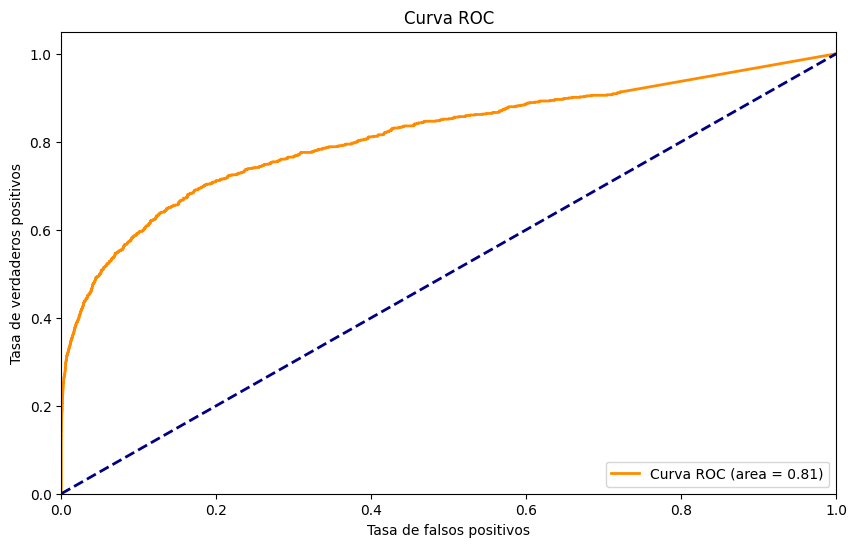

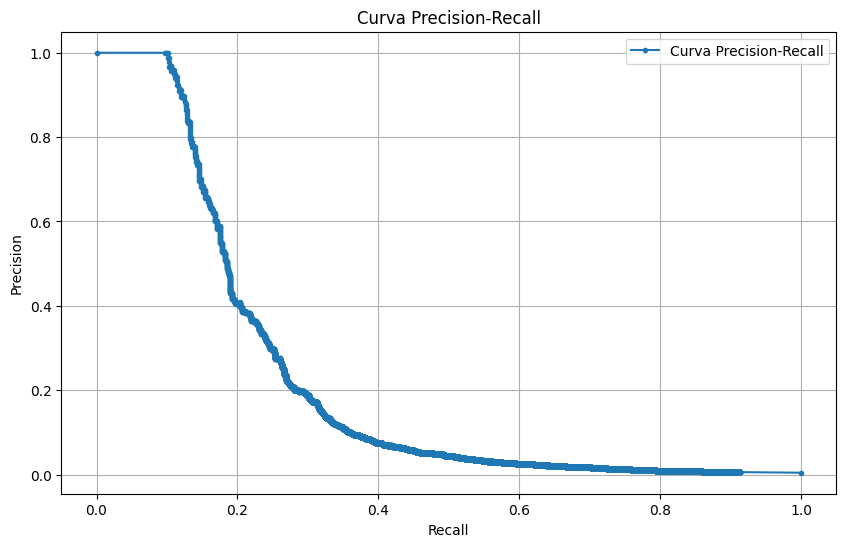

Mejor umbral: 0.9923312664031982
Mejor F1-score: 0.2794759825327511
Precision en el mejor umbral: 0.36432637571157495
Recall en el mejor umbral: 0.22668240850059032
Precision con umbral óptimo: 0.36311787072243346
Recall con umbral óptimo: 0.2255017709563164
F1-score con umbral óptimo: 0.27822286962855064
Modelo guardado en "modelo_entrenado_lstm.h5"


In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score

# Suponiendo que df_procesado ya está disponible y contiene una columna 'trans_date_trans_time'
df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])
datos_2019 = df_procesado[df_procesado['trans_date_trans_time'].dt.year == 2019]

# Asegurando que los datos estén ordenados por fecha para series de tiempo
datos_2019 = datos_2019.sort_values(by='trans_date_trans_time')

# Preparando los datos
caracteristicas = datos_2019.drop(columns=['is_fraud', 'trans_date_trans_time'])
caracteristicas_numericas = caracteristicas.select_dtypes(include=['float64', 'int64'])
objetivo = datos_2019['is_fraud']

# Normalizando las características
escalador = StandardScaler()
caracteristicas_escaladas = escalador.fit_transform(caracteristicas_numericas)

# Dividiendo los datos en entrenamiento y prueba
X_entreno_desarrollo, X_prueba, y_entreno_desarrollo, y_prueba = train_test_split(
    caracteristicas_escaladas, objetivo, test_size=0.2, random_state=42, shuffle=False)

X_entreno, X_desarrollo, y_entreno, y_desarrollo = train_test_split(
    X_entreno_desarrollo, y_entreno_desarrollo, test_size=0.25, random_state=42, shuffle=False)

# Redimensionando los datos para LSTM
def reshape_for_lstm(X):
    return X.reshape((X.shape[0], 1, X.shape[1]))

X_entreno = reshape_for_lstm(X_entreno)
X_desarrollo = reshape_for_lstm(X_desarrollo)
X_prueba = reshape_for_lstm(X_prueba)

# Crear y aplicar SMOTE para sobremuestreo
from imblearn.over_sampling import SMOTE

X_entreno_2d = X_entreno.reshape((X_entreno.shape[0], X_entreno.shape[2]))
sobremuestreador = SMOTE(sampling_strategy="auto")
X_entreno_resampleado_2d, y_entreno_resampleado = sobremuestreador.fit_resample(X_entreno_2d, y_entreno)
X_entreno_resampleado = reshape_for_lstm(X_entreno_resampleado_2d)

# Definiendo la arquitectura de la red neuronal LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(X_entreno_resampleado.shape[1], X_entreno_resampleado.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_entreno_resampleado, y_entreno_resampleado, epochs=10, batch_size=256, validation_data=(X_desarrollo, y_desarrollo))

test_loss, test_acc = model.evaluate(X_prueba, y_prueba)
print('Test accuracy:', test_acc)

y_pred_prob = model.predict(X_prueba)

fpr, tpr, thresholds = roc_curve(y_prueba, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

precision, recall, thresholds_pr = precision_recall_curve(y_prueba, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()

f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds_pr[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]

print(f'Mejor umbral: {best_threshold}')
print(f'Mejor F1-score: {best_f1}')
print(f'Precision en el mejor umbral: {best_precision}')
print(f'Recall en el mejor umbral: {best_recall}')

y_pred_optimal = (y_pred_prob > best_threshold).astype(int)

optimal_precision = precision_score(y_prueba, y_pred_optimal)
optimal_recall = recall_score(y_prueba, y_pred_optimal)
optimal_f1 = f1_score(y_prueba, y_pred_optimal)

print(f'Precision con umbral óptimo: {optimal_precision}')
print(f'Recall con umbral óptimo: {optimal_recall}')
print(f'F1-score con umbral óptimo: {optimal_f1}')

model.save('modelo_entrenado_lstm.h5')
print('Modelo guardado en "modelo_entrenado_lstm.h5"')


Observaciones del Entrenamiento
Exactitud en Entrenamiento y Validación:

La exactitud (accuracy) en el conjunto de entrenamiento es muy alta, alcanzando un 99.52% al final del entrenamiento.
La exactitud en el conjunto de validación también es alta, con un 99.35% al final del entrenamiento.
Esto sugiere que el modelo está aprendiendo bien los patrones en los datos de entrenamiento y está generalizando bien en el conjunto de validación.
Pérdida (Loss) en Entrenamiento y Validación:

La pérdida (loss) en el conjunto de entrenamiento disminuye consistentemente, lo cual es una señal de que el modelo está convergiendo.
La pérdida en el conjunto de validación es relativamente baja, pero aumenta hacia el final del entrenamiento, lo cual podría indicar un inicio de sobreajuste (overfitting).
Observaciones de la Evaluación
Exactitud en el Conjunto de Prueba:

El modelo logra una alta exactitud en el conjunto de prueba (99.42%), lo cual es positivo, pero la exactitud por sí sola no es un buen indicador de desempeño en problemas de clasificación desbalanceados como el fraude.
AUC (Área Bajo la Curva ROC):

El AUC obtenido es de aproximadamente 0.759, lo cual sugiere que el modelo tiene una capacidad moderada para distinguir entre clases positivas (fraude) y negativas (no fraude). Un AUC más cercano a 1.0 es deseable.
Mejor Umbral y Métricas Asociadas:

El mejor umbral encontrado es aproximadamente 0.676.
El F1-score en este umbral es 0.309, lo cual es bastante bajo. Esto sugiere que, aunque el modelo es preciso, no está capturando bien las instancias de fraude.
La precisión (precision) y el recall en este umbral también son bajos (0.361 y 0.270 respectivamente). Esto indica que el modelo no está equilibrando bien la precisión y la capacidad de encontrar todas las instancias de fraude.
Conclusiones y Recomendaciones
Problema de Desbalance de Clases:

El bajo F1-score, precisión y recall indican que el modelo está luchando con el desbalance de clases, típico en problemas de detección de fraude.
Posible Sobreajuste:

El incremento en la pérdida de validación hacia el final del entrenamiento sugiere un posible sobreajuste. Para mitigar esto, se podrían aplicar técnicas de regularización, como Dropout, o realizar una parada temprana (early stopping).
Mejoras Potenciales:

Aumentar Datos de Fraude: Utilizar técnicas de sobremuestreo más avanzadas o generar más datos de fraude si es posible.
Ajustar Hiperparámetros: Realizar una búsqueda de hiperparámetros (grid search o random search) para encontrar la configuración óptima de la red neuronal.
Enriquecer Características: Crear nuevas características que puedan ayudar al modelo a identificar mejor los patrones de fraude.
Modelos Ensamblados (Ensemble): Considerar combinar múltiples modelos (por ejemplo, LSTM y modelos de árboles de decisión) para mejorar la capacidad de detección.
Métricas de Evaluación:

Utilizar métricas adicionales como el F2-score o la tasa de falsos positivos, que pueden ser más relevantes en el contexto de fraude.
En resumen, aunque el modelo muestra una alta exactitud, las métricas más relevantes para la detección de fraude indican que hay espacio para mejoras significativas. Adaptar la estrategia de entrenamiento y considerar diferentes enfoques podría ayudar a mejorar el desempeño del modelo en la detección de fraudes.

In [37]:

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Suponiendo que df_procesado ya está disponible y contiene una columna 'trans_date_trans_time'
df_procesado['trans_date_trans_time'] = pd.to_datetime(df_procesado['trans_date_trans_time'])
datos_2019 = df_procesado[df_procesado['trans_date_trans_time'].dt.year == 2019]

# Asegurando que los datos estén ordenados por fecha para series de tiempo
datos_2019 = datos_2019.sort_values(by='trans_date_trans_time')

# Preparando los datos
caracteristicas = datos_2019.drop(columns=['is_fraud', 'trans_date_trans_time'])
caracteristicas_numericas = caracteristicas.select_dtypes(include=['float64', 'int64'])
objetivo = datos_2019['is_fraud']

# Normalizando las características
escalador = StandardScaler()
caracteristicas_escaladas = escalador.fit_transform(caracteristicas_numericas)

# Dividiendo los datos en entrenamiento y prueba
X_entreno_desarrollo, X_prueba, y_entreno_desarrollo, y_prueba = train_test_split(
    caracteristicas_escaladas, objetivo, test_size=0.2, random_state=42, shuffle=False)

X_entreno, X_desarrollo, y_entreno, y_desarrollo = train_test_split(
    X_entreno_desarrollo, y_entreno_desarrollo, test_size=0.25, random_state=42, shuffle=False)

# Crear y aplicar SMOTE para sobremuestreo
sobremuestreador = SMOTE(sampling_strategy="auto")
X_entreno_resampleado, y_entreno_resampleado = sobremuestreador.fit_resample(X_entreno, y_entreno)

# Definiendo la arquitectura de la red neuronal artificial (ANN) con regularización
model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_entreno_resampleado.shape[1],),
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_ann.fit(X_entreno_resampleado, y_entreno_resampleado, epochs=50, batch_size=256, 
                        validation_data=(X_desarrollo, y_desarrollo), callbacks=[early_stopping])

# Ajustar hiperparámetros del modelo Random Forest usando Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid, cv=3, scoring='f1')
grid_search.fit(X_entreno, y_entreno)

model_rf_optimizado = grid_search.best_estimator_

# Obtener predicciones del modelo Random Forest optimizado
y_pred_rf_optimizado = model_rf_optimizado.predict_proba(X_prueba)[:, 1]

# Obtener predicciones del modelo ANN
y_pred_ann = model_ann.predict(X_prueba)

# Combinar predicciones de ambos modelos
y_pred_hibrido = (y_pred_ann.squeeze() + y_pred_rf_optimizado) / 2.0

# Evaluar el modelo híbrido
fpr, tpr, thresholds = roc_curve(y_prueba, y_pred_hibrido)
roc_auc = auc(fpr, tpr)
print('AUC del modelo híbrido:', roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC del modelo híbrido')
plt.legend(loc='lower right')
plt.show()

precision, recall, thresholds_pr = precision_recall_curve(y_prueba, y_pred_hibrido)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Curva Precision-Recall del modelo híbrido')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall del modelo híbrido')
plt.legend()
plt.grid(True)
plt.show()

f1_scores = 2 * (precision * recall) / (precision + recall)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds_pr[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]

print(f'Mejor umbral del modelo híbrido: {best_threshold}')
print(f'Mejor F1-score del modelo híbrido: {best_f1}')
print(f'Precision en el mejor umbral del modelo híbrido: {best_precision}')
print(f'Recall en el mejor umbral del modelo híbrido: {best_recall}')

y_pred_hibrido_optimal = (y_pred_hibrido > best_threshold).astype(int)

optimal_precision = precision_score(y_prueba, y_pred_hibrido_optimal)
optimal_recall = recall_score(y_prueba, y_pred_hibrido_optimal)
optimal_f1 = f1_score(y_prueba, y_pred_hibrido_optimal)

print(f'Precision con umbral óptimo del modelo híbrido: {optimal_precision}')
print(f'Recall con umbral óptimo del modelo híbrido: {optimal_recall}')
print(f'F1-score con umbral óptimo del modelo híbrido: {optimal_f1}')

# Guardar el modelo entrenado de ANN
model_ann.save('modelo_entrenado_ann.h5')
print('Modelo ANN guardado en "modelo_entrenado_ann.h5"')

# Guardar el modelo entrenado de Random Forest optimizado
joblib.dump(model_rf_optimizado, 'modelo_entrenado_rf_optimizado.pkl')
print('Modelo Random Forest optimizado guardado en "modelo_entrenado_rf_optimizado.pkl"')





Epoch 1/50


c:\Users\eduar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4310/4310 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8712 - loss: 0.3634 - val_accuracy: 0.9674 - val_loss: 0.1122
Epoch 2/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9177 - loss: 0.2312 - val_accuracy: 0.9798 - val_loss: 0.0905
Epoch 3/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9207 - loss: 0.2229 - val_accuracy: 0.9753 - val_loss: 0.0905
Epoch 4/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9228 - loss: 0.2186 - val_accuracy: 0.9777 - val_loss: 0.0880
Epoch 5/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9247 - loss: 0.2142 - val_accuracy: 0.9779 - val_loss: 0.0908
Epoch 6/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9252 - loss: 0.2123 - val_accuracy: 0.9791 - val_loss: 0.0822
Epoch 7/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9259 - loss: 0.2102 - val_accuracy: 0.9815 - val_loss: 0.0786
Epoch 8/50
4310/4310 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9268 - loss: 0.2089 - val_accura

KeyboardInterrupt: 